In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### 参考torch.optim.SGD

In [2]:
mnist = np.load("../../../../../Other/datasets/NumPy/mnist.npz")
X_train, y_train, X_test, y_test = tf.cast(tf.expand_dims(tf.constant(mnist['x_train']), -1), tf.float32), tf.constant(mnist['y_train']), tf.cast(
    tf.expand_dims(
        tf.constant(mnist['x_test']), -1), tf.float32), tf.constant(mnist['y_test'])

# 归一化
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
model = Sequential([
    layers.Conv2D(6, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='relu'),
])

In [4]:
'''
SGD默认参数:
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD', **kwargs
)
'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,  # 对应torch.optim.SGD lr参数
                                                momentum=0.95,  # 对应torch.optim.SGD momentum参数
                                                nesterov=True),  # 对应torch.optim.SGD nesterov参数
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))


Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7067 - accuracy: 0.7314 - val_loss: 0.5147 - val_accuracy: 0.7887
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3671 - accuracy: 0.8554 - val_loss: 0.2862 - val_accuracy: 0.8850
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2783 - accuracy: 0.8887 - val_loss: 0.2988 - val_accuracy: 0.8835
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1436 - accuracy: 0.9449 - val_loss: 0.0637 - val_accuracy: 0.9813
Epoch 5/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0353 - accuracy: 0.9901 - val_loss: 0.0418 - val_accuracy: 0.9868
Epoch 6/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.0407 - val_accuracy: 0.9891
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0524 - val_

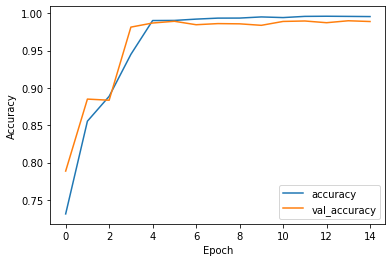

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4